In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
# Load the dataset
# Note: Ensure the file is in the same folder as your notebook
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Company Wise Dec Month.xls'

# We skip the first 3 rows of metadata to reach the header
# We manually define columns based on the report structure
column_names = ['Index_Empty', 'Company', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df = pd.read_excel(file_path, skiprows=4, names=column_names)

# Display the first few rows to verify
df.head()

,Index_Empty,Company,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
0,NaN,INDIVIDUALS,1.0,0.04,1.0,45046.92,0.58,45046.92,45046.92
1,NaN,AGODA,35.0,1.51,64.0,146098.07,1.88,4174.23,2282.78
2,NaN,AIR INDIA EXPRESS LTD,540.0,23.28,554.0,1105700.00,14.20,2047.59,1995.85
3,NaN,AKOODE TECHNOLOGIES PRIVATE LIMITED,3.0,0.13,9.0,9785.71,0.13,3261.90,1087.30
4,NaN,ANZ SUPPORT SERVICES INDIA PRIVATE LTD,173.0,7.46,173.0,813100.00,10.44,4700.00,4700.00


In [7]:
# 1. Drop the unnecessary empty first column
df = df.drop(columns=['Index_Empty'])

# 2. Remove rows where 'Company' is missing or labeled as 'Total'
df = df.dropna(subset=['Company'])
df = df[~df['Company'].str.contains('Total|Grand Total', case=False, na=False)]

# 3. Clean numeric columns (Remove commas and convert to float)
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 4. Remove rows with 0 Revenue to focus on active contributors
df_clean = df[df['Room_Revenue'] > 0].copy()

print(f"Data Cleaning Complete. Analyzed {len(df_clean)} active companies.")
df_clean.describe()

Data Cleaning Complete. Analyzed 56 active companies.


,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
count,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000
mean,41.375000,1.783929,56.857143,1.390337e+05,1.785536,4669.514107,3628.774464
std,87.267731,3.761858,107.773403,2.284129e+05,2.933452,5633.154972,5735.985461
min,0.000000,0.000000,0.000000,2.261900e+03,0.030000,0.000000,0.000000
25%,3.000000,0.130000,4.000000,1.425000e+04,0.185000,3258.925000,2110.120000
50%,9.000000,0.385000,11.500000,3.425593e+04,0.440000,3925.900000,3005.030000
75%,36.500000,1.572500,55.250000,1.491816e+05,1.915000,4500.000000,3640.710000
max,540.000000,23.280000,554.000000,1.105700e+06,14.200000,45046.920000,45046.920000


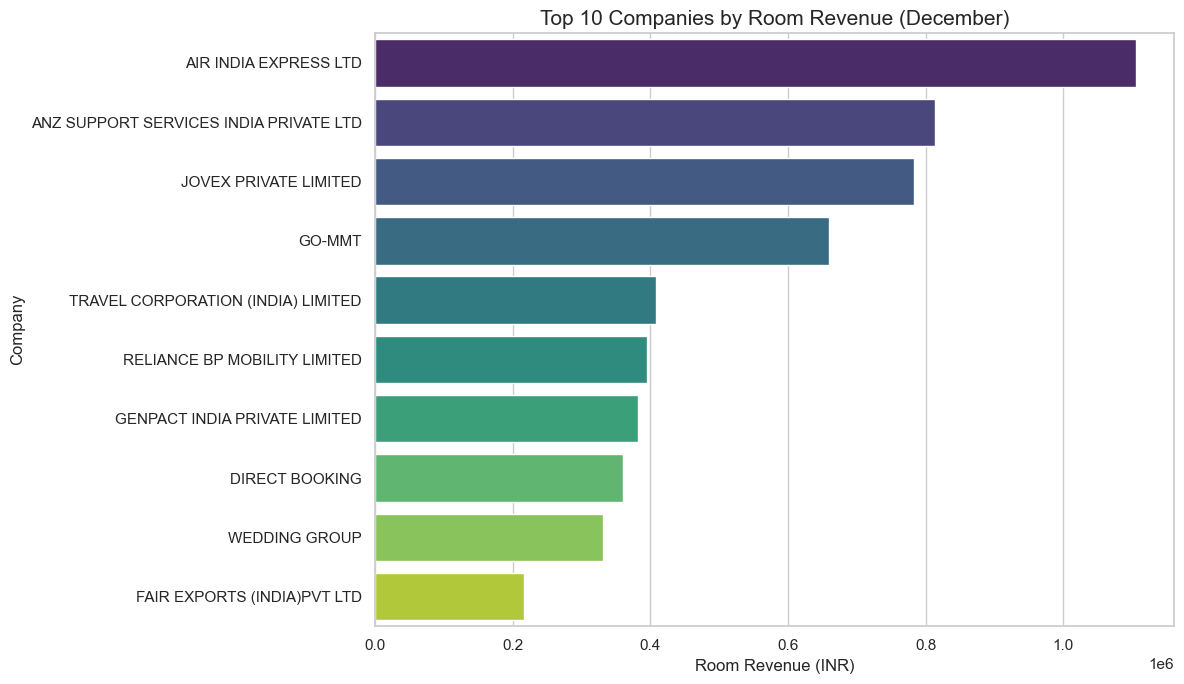

In [8]:
# Sort by Room Revenue
top_10_revenue = df_clean.sort_values(by='Room_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_revenue, x='Room_Revenue', y='Company', palette='viridis')
plt.title('Top 10 Companies by Room Revenue (December)', fontsize=15)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.tight_layout()
plt.show()

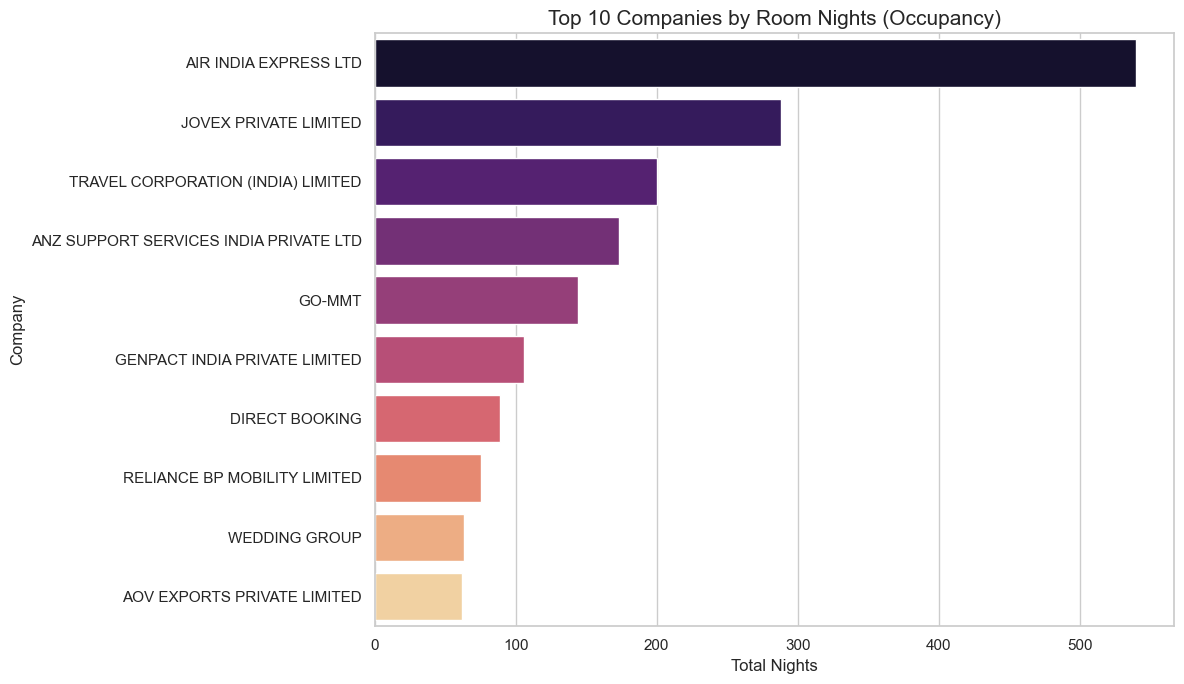

In [9]:
# Sort by Nights
top_10_nights = df_clean.sort_values(by='Nights', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_nights, x='Nights', y='Company', palette='magma')
plt.title('Top 10 Companies by Room Nights (Occupancy)', fontsize=15)
plt.xlabel('Total Nights', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.tight_layout()
plt.show()

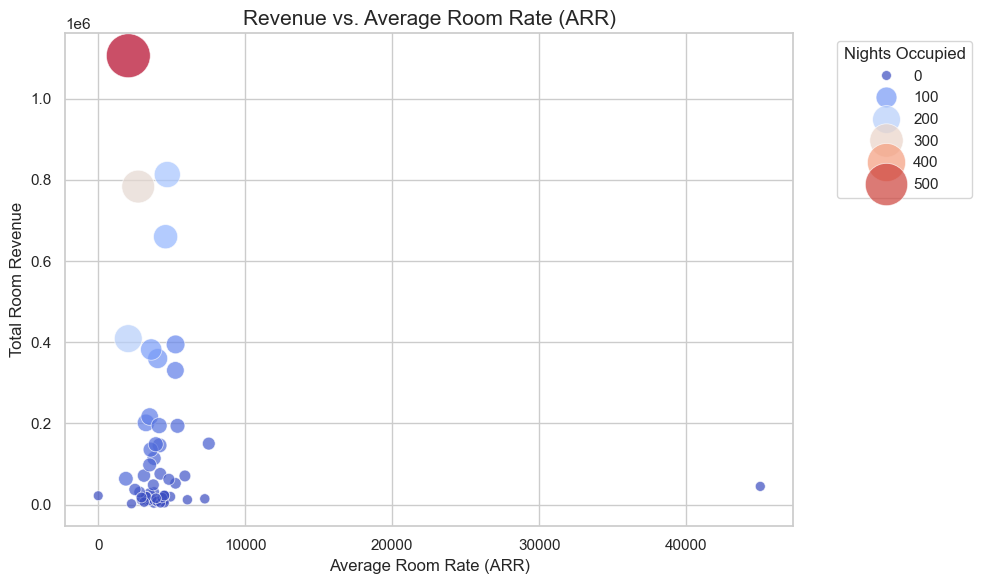

In [10]:
# This scatter plot helps identify high-value vs high-volume clients
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='ARR', y='Room_Revenue', size='Nights', 
                hue='Nights', sizes=(50, 1000), alpha=0.7, palette='coolwarm')

plt.title('Revenue vs. Average Room Rate (ARR)', fontsize=15)
plt.xlabel('Average Room Rate (ARR)', fontsize=12)
plt.ylabel('Total Room Revenue', fontsize=12)
plt.legend(title='Nights Occupied', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Create a summary of the most impactful segments
summary = df_clean[['Company', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']]
summary = summary.sort_values(by='Room_Revenue', ascending=False)

# Export to CSV for presentation
summary.to_csv('Company_Analysis_Cleaned.csv', index=False)

print("Analysis Complete. Top 5 Contributors:")
summary.head(5)

Analysis Complete. Top 5 Contributors:


,Company,Nights,Room_Revenue,ARR,Revenue_Pct
2,AIR INDIA EXPRESS LTD,540.0,1105700.00,2047.59,14.20
4,ANZ SUPPORT SERVICES INDIA PRIVATE LTD,173.0,813100.00,4700.00,10.44
33,JOVEX PRIVATE LIMITED,288.0,783450.00,2720.31,10.06
26,GO-MMT,144.0,659993.14,4583.29,8.48
51,TRAVEL CORPORATION (INDIA) LIMITED,200.0,408963.81,2044.82,5.25


#### Key Insights Identified:
#### Revenue Concentration: A few key accounts like AIR INDIA EXPRESS LTD and ANZ SUPPORT SERVICES contribute a significant portion of the total revenue.

#### High Volume vs. High Value:

#### AIR INDIA EXPRESS LTD is your high-volume partner (most nights).

#### INDIVIDUALS represent high-value transactions with a significantly higher ARR (Average Room Rate) compared to corporate contracts.

#### Occupancy Driver: While corporate accounts drive the majority of the "Nights," their ARR is typically lower than individual walk-ins or online bookings.